In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

Write down a general function using the built-in plot_wigner function to visualize the Wigner function in 2D and 3D for a given state $\ket \psi$

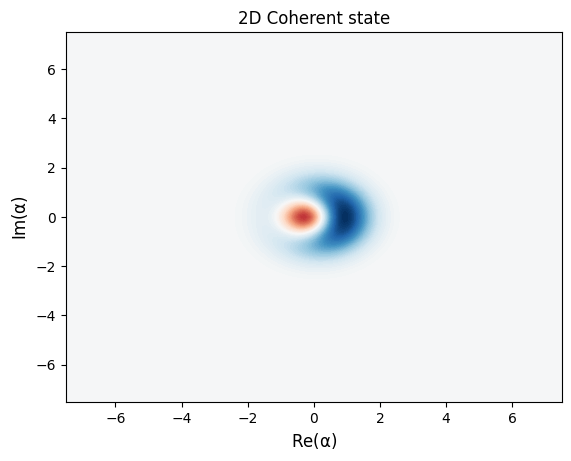

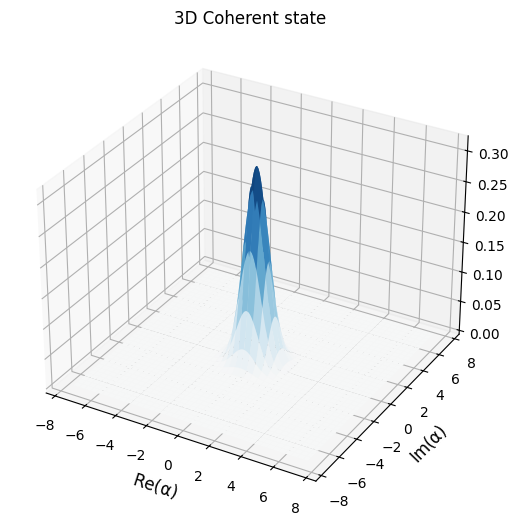

In [49]:
a_2D = coherent_dm(2, 1)
plot_wigner(a_2D)
plt.title(rf"2D Coherent state")
plt.show()


fock_1 = basis(20, 0)
plot_wigner(fock_1, projection='3d')
plt.title(rf"3D Coherent state")
plt.show()

The Fock state $\ket n$ is defined using the built-in function basis(N,n) for a Fock space of length N. In this exercise we assume a Fock space of length $N = 20$.

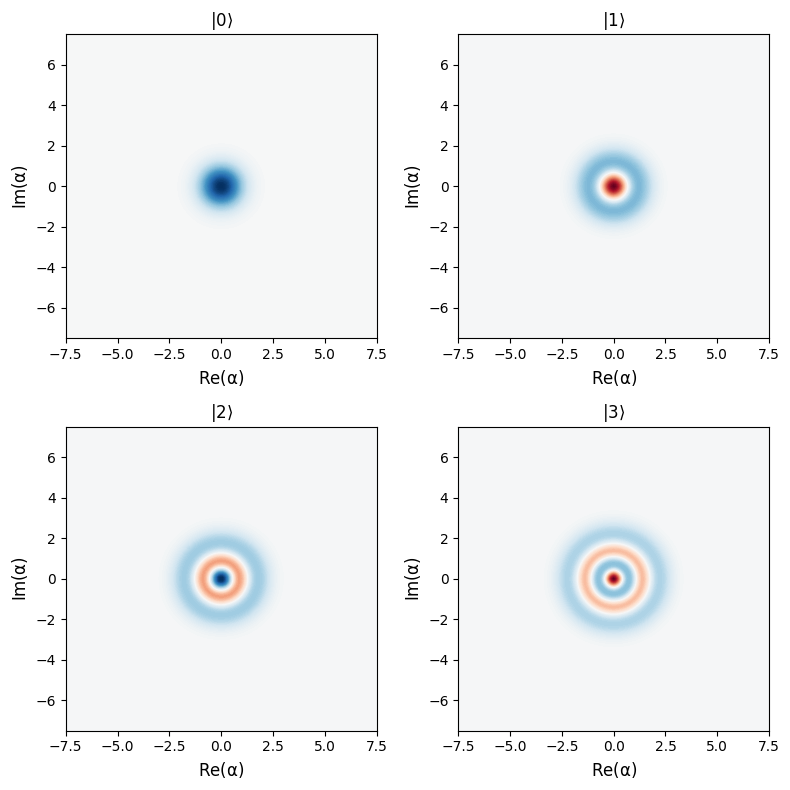

In [31]:
# Set up parameters
N = 20  # Number of basis states

# Create a figure with 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop over Fock states |n⟩ for n=0,1,2,3
for n, ax in zip([0, 1, 2, 3], axes):
    state = basis(N, n)  # Create Fock state |n⟩
    
    # Use plot_wigner to plot the Wigner function on the specified axis
    plot_wigner(state, fig=fig, ax=ax)
    
    # Add title with the ket notation for the Fock state
    ax.set_title(r"$|{n}\rangle$".format(n=n))

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

The coherent state $\ket \alpha$ is defined using the built-in function coherent(N,α), where $N$ is similar to part (2). Plot the Wigner function of a coherent state $\ket \alpha$ for $\alpha = 2$ and $\alpha = -2$

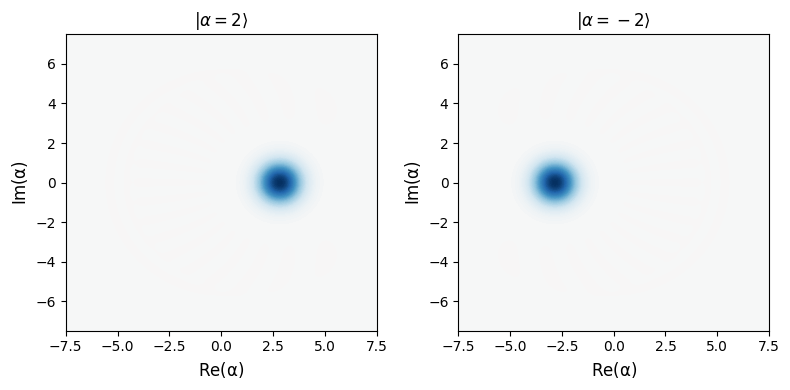

In [37]:
# Set up parameters
N = 20  # Hilbert space dimension

# Create a figure with 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust figsize for better layout

# Create coherent states with alpha = 2 and alpha = -2
a_2 = coherent(N, 2)
a_minus2 = coherent(N, -2)

# Plot Wigner function for coherent state alpha = 2
plot_wigner(a_2, fig=fig, ax=axes[0])
axes[0].set_title(r"$|\alpha = 2\rangle$")

# Plot Wigner function for coherent state alpha = -2
plot_wigner(a_minus2, fig=fig, ax=axes[1])
axes[1].set_title(r"$|\alpha = -2\rangle$")

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()

In quantum mechanics a cat state is a quantum state that is a superposition of two diametrically opposed states at the same time, such as the possibilities that a cat be alive and dead at the same time (Schrödinger's cat). In quantum optics a Schrödinger cat state is composed of two coherent states with opposite phases $\ket \alpha$ and $\ket{-\alpha}$:

\begin{equation}
\ket{cat} = \frac{\ket \alpha + \ket{-\alpha}}{\sqrt{2}}
\end{equation}

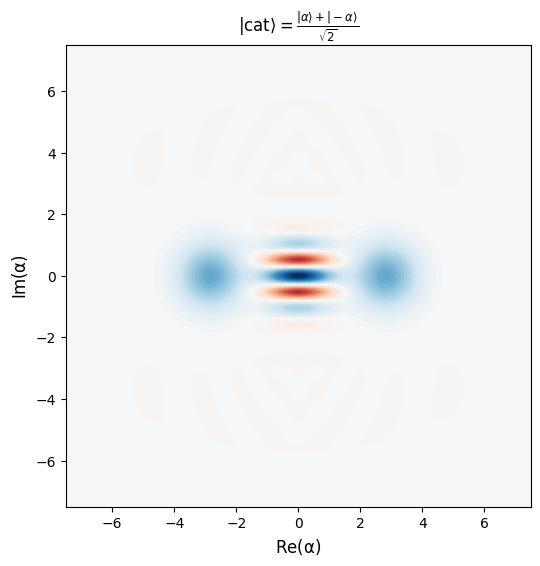

In [38]:
# Create the cat state |cat> = (|alpha> + |-alpha>) / sqrt(2)
cat_state = (a_2 + a_minus2).unit()  # Normalization by itself

# Plot the Wigner function for the cat state
fig, ax = plt.subplots(figsize=(6, 6))
plot_wigner(cat_state, fig=fig, ax=ax)
ax.set_title(r"$|\text{cat} \rangle = \frac{|\alpha\rangle + |-\alpha\rangle}{\sqrt{2}}$")
plt.show()